In [35]:
import numpy as np
from math import sqrt
import warnings
from matplotlib import style
from collections import Counter
import pandas as pd
import matplotlib.pyplot as plt
import random
from collections import Counter
style.use('fivethirtyeight')

In [36]:
dataset= {'k':[[1,2], [2,3], [3,1]],'r':[[6,5], [7,7], [8,6]] }
new_feature = [5,7]

In [37]:
dist = []
for i in dataset:
    for el in dataset[i]:
        dist.append((sqrt(sum(  (np.array(el) - np.array(new_feature) )**2 )), i))
        # print(el)

sorted_dist = sorted(dist)
votes = [i[1] for i in sorted_dist[:3] ]
Counter(votes).most_common()[0][0]

'r'

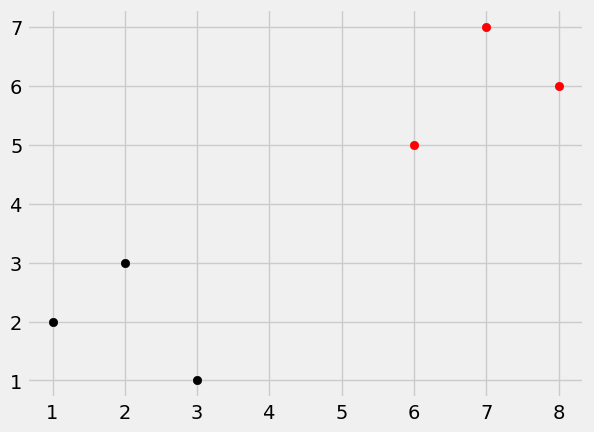

In [38]:
for i in dataset:
    for el in dataset[i]:
        plt.scatter(el[0], el[1], c=i)  

Testing using breast cancer dataset


In [39]:
df = pd.read_csv('./data sets/breast-cancer-wisconsin.data')

In [40]:
df.drop(['id'], axis=1, inplace=True)
df.replace('?', -99999, inplace=True)

In [41]:
data =  df.astype(float).values.tolist()
data[:3]

[[5.0, 1.0, 1.0, 1.0, 2.0, 1.0, 3.0, 1.0, 1.0, 2.0],
 [5.0, 4.0, 4.0, 5.0, 7.0, 10.0, 3.0, 2.0, 1.0, 2.0],
 [3.0, 1.0, 1.0, 1.0, 2.0, 2.0, 3.0, 1.0, 1.0, 2.0]]

In [42]:
random.shuffle(data)


In [43]:
test_size =  0.2
train_set = {2:[], 4:[]}
test_set = {2:[], 4:[]}
train_data =  data[:-int(test_size*len(data))]
test_data = data[-int(test_size*len(data)):]

In [44]:
for i in train_data:
    train_set[i[-1]].append(i[:-1])

for i in test_data:
    test_set[i[-1]].append(i[:-1])

In [45]:
def knn(dataset, trainSet, k=3):
    dist = []
    for i in trainSet:
        for el in trainSet[i]:
            euclidean_distance = sqrt(sum(  (np.array(el) - np.array(dataset) )**2 ))
            dist.append((euclidean_distance, i))

    sorted_dist =  sorted(dist)
    votes =  [i[1] for i in sorted_dist[:k] ]
    confidence =  Counter(votes).most_common()[0][1]/k
    group = Counter(votes).most_common()[0][0]
    
    return group, confidence

In [48]:
correct = 0
total = 0
for i in test_set:
    for el in test_set[i]:
        group, confidence =  knn(el, train_set, k=25)
        if group == i:
            correct += 1
        
        total += 1

print('Accuracy: ', correct/total)


Accuracy:  0.9640287769784173


In [49]:
predict = [5.0, 1.0, 1.0, 1.0, 2.0, 1.0, 3.0, 1.0, 1.0]
votes, confidence = knn(predict, train_set, k=25)
votes

2